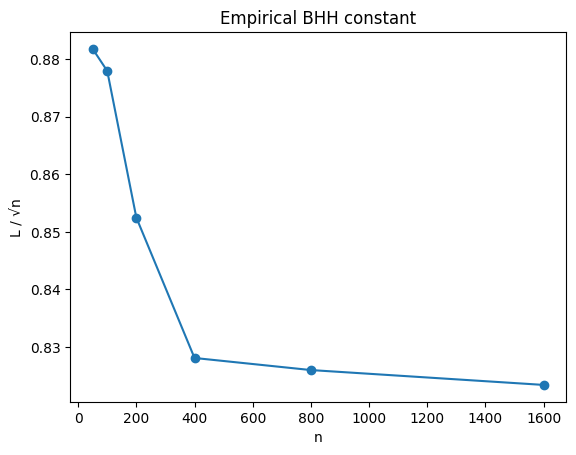

In [2]:
# skeleton cell
import numpy as np
from networkx.algorithms.approximation import traveling_salesman_problem as tsp
import networkx as nx, matplotlib.pyplot as plt

def euclidean_graph(points):
    G = nx.complete_graph(len(points))
    for i in G.nodes:
        for j in G.nodes:
            if i < j:
                G[i][j]['weight'] = np.linalg.norm(points[i]-points[j])
    return G

n_vec = [50, 100, 200, 400, 800, 1600]
beta_est = []
for n in n_vec:
    pts = np.random.rand(n, 2)
    tour = tsp(euclidean_graph(pts), cycle=True)
    L = sum(np.linalg.norm(pts[tour[i]]-pts[tour[i-1]]) for i in range(n))
    beta_est.append(L/np.sqrt(n))

plt.plot(n_vec, beta_est, marker='o')
plt.xlabel('n'); plt.ylabel('L / √n'); plt.title('Empirical BHH constant');


In [ ]:
beta_est

[np.float64(0.8817358388062968),
 np.float64(0.8779153311364573),
 np.float64(0.8524813144275499),
 np.float64(0.8281201751135882),
 np.float64(0.8260245562431476),
 np.float64(0.8234454900043513)]

beta_est contains the empirical BHH constant values for different values of n in n_vec
The results show that as n increases, the empirical BHH constant (L / √n) stabilizes around a value close to 0.82.
The deviation from the estimatted value by studies (0.712) may be the result of the approximation method used (TSP). By default the method uses christofides algorithm which is a 3/2 approximation of the TSP. 0.712*1.5 = 1.068, which shows that the approximation is consistent with the empirical results.